In [1]:
import random
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
from helpers import eig
from sklearn.cluster import KMeans

# Exercise 4

(1000, 1)
(784, 1000)


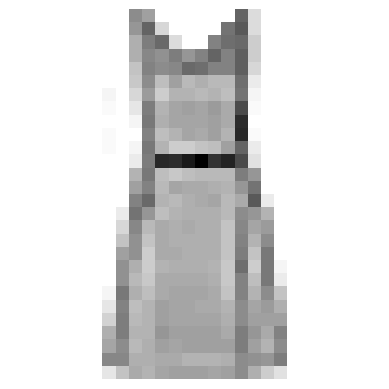

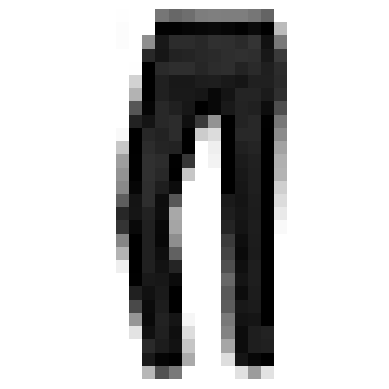

In [2]:
mat = scipy.io.loadmat('hw2_zalando_new.mat')

correct = mat['correct']
items = mat['items']

print(correct.shape)
print(items.shape)


def zalando_plot(z):
    n = 28  # Image size
    A = np.reshape(z, (n, n))

    # Normalize it
    I = np.argmax(np.abs(z))
    za = z[I]
    A = A / za

    B = 1 - A # It looks nicer with a white background.

    # Plot
    plt.imshow(B, cmap='gray', origin='upper')
    plt.axis('off')
    plt.show()

zalando_plot(items[:,0])
zalando_plot(items[:,1])


Clearly pants and dresses are the two items in the dataset

In [3]:
def build_distance(items, w):  #Vectorized way of computing distance
    w = np.array([w]).T
    items = w * items
    S = np.sum(items**2, axis=0, keepdims=True)
    S = np.sqrt(np.maximum(0,(S + S.T - 2 * items.T.dot(items))))   #maximum just to silence the warning message of possible negative values inside (np.sqrt)
    np.fill_diagonal(S, 0)
    return S

# Here is a slower but more intuitive way of computing the distances:
"""
def build_distance(items, w):
    num_points = items.shape[1]
    S = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i, num_points):
            dist = np.linalg.norm(w * (items[:, i] - items[:, j]))
            S[i, j] = dist
            S[j, i] = dist
    return S
""" 

w = np.ones(items[:,1].shape[0])
S= build_distance(items, w)

### B)

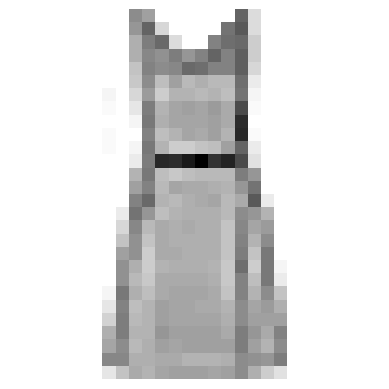

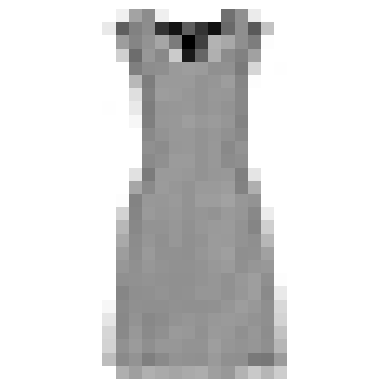

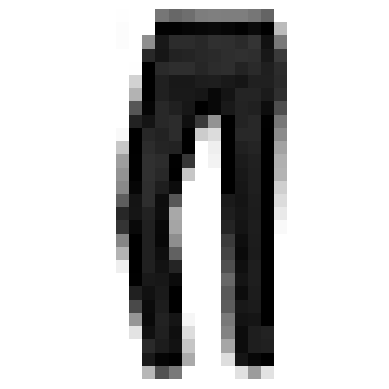

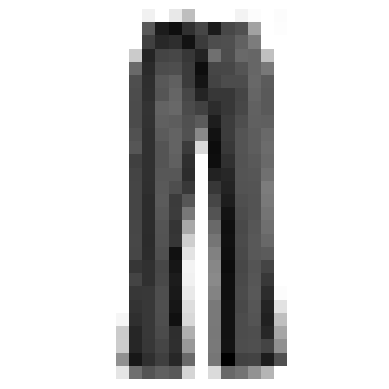

In [4]:
# First item:
zalando_plot(items[:,0])

# Closest to first item:
index = np.argmin(S[0,1:]) + 1
zalando_plot(items[:,index])

# Second item:
zalando_plot(items[:,1])

# Closest to second item
index = np.argmin(S[1,2:]) + 1
zalando_plot(items[:,index])

In [5]:
def build_weights(S):  # Quicker vectorized version
    alpha = 0.5
    W = np.zeros(S.shape)
    sigma = np.std(S, axis = 1)
    W = np.exp(-alpha*S**2/sigma**2)
    W -= np.diag(np.diag(W))
    W = (W+W.T)/2
    return W

def build_weights_slow(S): # Slow but intuitive version
    W = np.zeros(S.shape)
    alpha = 0.5
    for i in range(S.shape[0]):
        sigma = np.std(S[:,i])
        for j in range(S.shape[0]):
            W[i,j] = np.exp((-alpha*S[i,j]**2)/(sigma**2))
    W -= np.diag(np.diag(W))
    W = (W+W.T)/2
    return W

import time

start_time = time.time()
W = build_weights_slow(S)
end_time = time.time()

print(W)
print("Elapsed time slow version: {:.2f} seconds".format(end_time - start_time))

[[0.00000000e+00 2.68312481e-07 1.36933751e-07 ... 6.08580244e-04
  3.25116019e-07 1.76428491e-07]
 [2.68312481e-07 0.00000000e+00 5.93980936e-03 ... 1.80088118e-05
  2.13960027e-05 2.56437328e-01]
 [1.36933751e-07 5.93980936e-03 0.00000000e+00 ... 1.75153947e-05
  2.34822478e-04 3.94580792e-03]
 ...
 [6.08580244e-04 1.80088118e-05 1.75153947e-05 ... 0.00000000e+00
  3.83932734e-06 1.15323883e-05]
 [3.25116019e-07 2.13960027e-05 2.34822478e-04 ... 3.83932734e-06
  0.00000000e+00 1.60736469e-05]
 [1.76428491e-07 2.56437328e-01 3.94580792e-03 ... 1.15323883e-05
  1.60736469e-05 0.00000000e+00]]
Elapsed time slow version: 0.64 seconds


In [6]:
start_time = time.time()
W = build_weights(S)
end_time = time.time()

print(W)
print("Elapsed time fast version: {:.2f} seconds".format(end_time - start_time))

[[0.00000000e+00 2.68312481e-07 1.36933751e-07 ... 6.08580244e-04
  3.25116019e-07 1.76428491e-07]
 [2.68312481e-07 0.00000000e+00 5.93980936e-03 ... 1.80088118e-05
  2.13960027e-05 2.56437328e-01]
 [1.36933751e-07 5.93980936e-03 0.00000000e+00 ... 1.75153947e-05
  2.34822478e-04 3.94580792e-03]
 ...
 [6.08580244e-04 1.80088118e-05 1.75153947e-05 ... 0.00000000e+00
  3.83932734e-06 1.15323883e-05]
 [3.25116019e-07 2.13960027e-05 2.34822478e-04 ... 3.83932734e-06
  0.00000000e+00 1.60736469e-05]
 [1.76428491e-07 2.56437328e-01 3.94580792e-03 ... 1.15323883e-05
  1.60736469e-05 0.00000000e+00]]
Elapsed time fast version: 0.01 seconds


### C)

(0.00098, 0.00102)

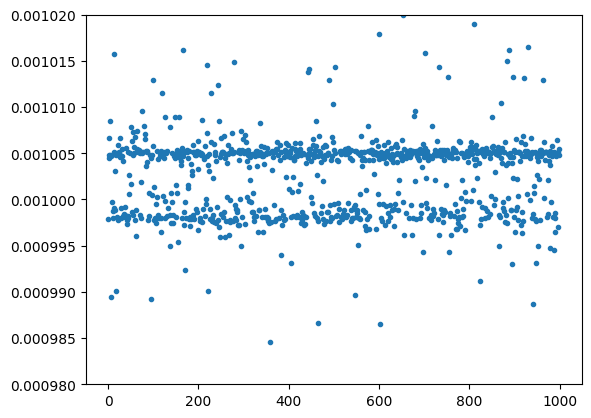

In [7]:
D = np.diag(np.sum(W, axis = 1))
L = D - W 

eigvals, eigvectors = eig(L)

xvals = np.zeros((eigvectors.shape[0],1))
plt.plot(eigvectors[:,1], '.')
plt.ylim(bottom = 0.00098, top = 0.00102)

### D)

In [8]:
tau = np.median(eigvectors[:,1])
predictions = 1*(eigvectors[:,1] < tau)
correct_adj = (correct-1).T[0]
accuracy = np.mean(predictions == correct_adj)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 82.0%


In [9]:
eigvectors[:,1]

array([ 9.97928781e-04,  1.00485455e-03,  1.00452187e-03,  1.00664825e-03,
        1.00481805e-03,  1.00852558e-03,  1.00465688e-03,  9.89394994e-04,
        1.00480662e-03,  9.99731391e-04,  9.98021170e-04,  9.98735783e-04,
        1.01574821e-03,  9.99092787e-04,  1.00516377e-03,  1.00309375e-03,
        9.98863454e-04,  9.90061442e-04,  1.00483994e-03,  1.00504505e-03,
        9.98146602e-04,  1.00592861e-03,  9.97819399e-04,  1.00490879e-03,
        1.00506270e-03,  1.00515247e-03,  1.00463764e-03,  1.00664186e-03,
        9.98004958e-04,  9.99083826e-04,  1.00469348e-03,  1.00550716e-03,
        9.98142198e-04,  9.98198985e-04,  1.00413605e-03,  1.09360649e-03,
        9.98416195e-04,  9.99168430e-04,  9.98331183e-04,  1.00554398e-03,
        9.67493981e-04,  9.97388951e-04,  9.97742084e-04,  1.00513817e-03,
        9.97990902e-04,  9.98265776e-04,  1.00060766e-03,  1.00268216e-03,
        1.04751037e-03,  1.00504363e-03,  1.00784333e-03,  1.00166165e-03,
        1.00636746e-03,  

### D - bonus, comparing with kNN + K-means

Accuracy: 0.1%


/Users/ludvig/Projects/SF2526-Lab2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


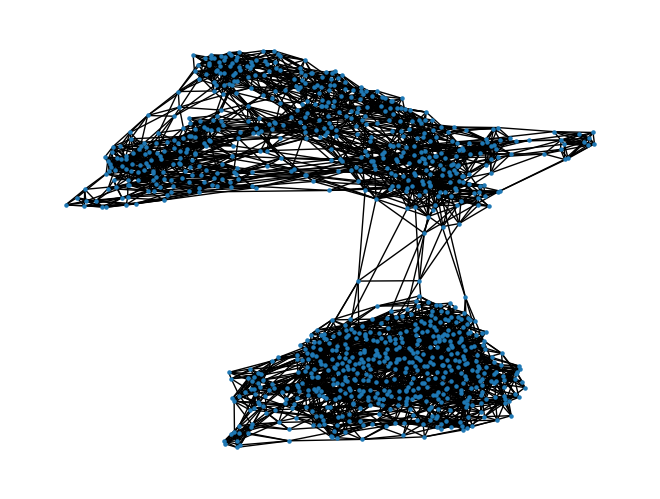

In [10]:
def knn(Dist, k):
    n = Dist.shape[0]
    W = np.zeros((n, n))
    knn_indices = np.argsort(Dist, axis=1)[:, :k+1]
    
    for i in range(n):
        W[i, knn_indices[i, 1:]] = 1
        W[knn_indices[i, 1:], i] = 1
    return W 

W = knn(S, 6)
G = nx.from_numpy_array(W)
nx.draw(G, node_size = 5)

def cluster(W, k):
    D = np.diag(np.sum(W, axis = 1))
    L = D - W
    _, eigvectors = eig(L)
    U = eigvectors[:,:k]
    kmeans = KMeans(n_clusters = k).fit(U)
    return kmeans.labels_

clusters = cluster(W, 2)

accuracy = np.mean(clusters == correct_adj)

print(f'Accuracy: {accuracy * 100}%')

### E)

In [11]:
def zalando_plot(z):  #Re-define function to work with subplot
    n = 28  # Image size
    A = np.reshape(z, (n, n))

    # Normalize it
    I = np.argmax(np.abs(z))
    za = z[I]
    A = A / za

    B = 1 - A # It looks nicer with a white background.
    return B

In [12]:
vec = 1 * (predictions != correct_adj)
wrong_guesses = vec.nonzero()[0]

In [13]:
idxs = [random.randrange(len(wrong_guesses)) for _ in range(4)]
II = wrong_guesses[idxs]
imagesd = {
    idx: {
        "prediction": predictions[idx],
        "actual": correct_adj[idx]
    }
    for idx in II
}
imagesd

{849: {'prediction': 0, 'actual': 1},
 322: {'prediction': 0, 'actual': 1},
 603: {'prediction': 1, 'actual': 0},
 76: {'prediction': 0, 'actual': 1}}

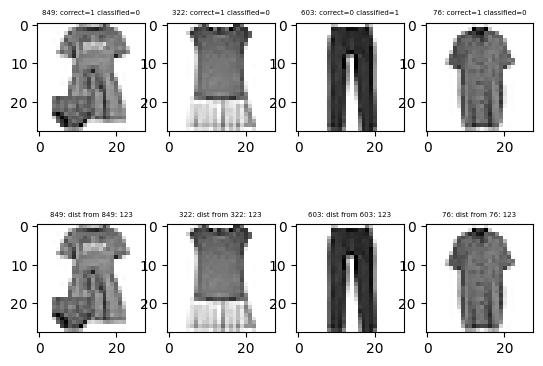

In [19]:
fig, axs = plt.subplots(2, 4)

for i, image_idx in enumerate(imagesd):
    d = imagesd[image_idx]
    axs[0, i].imshow(zalando_plot(items[:,image_idx]),cmap='gray', origin='upper')
    axs[0, i].set_title(f'{image_idx}: correct={d["actual"]} classified={d["prediction"]}', fontsize=5)

for i, image_idx in enumerate(imagesd):
    d = imagesd[image_idx]
    axs[1, i].imshow(zalando_plot(items[:,image_idx]),cmap='gray', origin='upper')
    axs[1, i].set_title(f'{image_idx}: dist from {image_idx}: 123', fontsize=5)

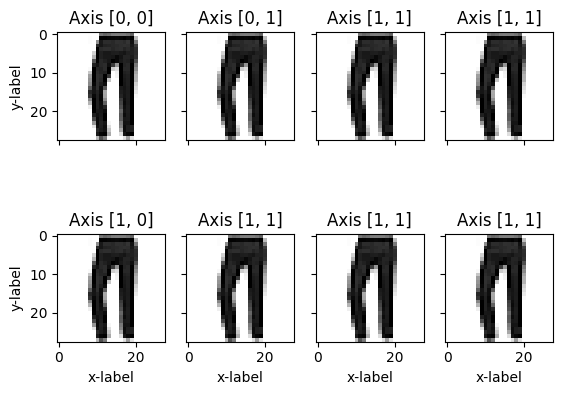

In [16]:

fig, axs = plt.subplots(2, 4)
axs[0, 0].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 2].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[1, 2].set_title('Axis [1, 1]')
axs[0, 2].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[0, 2].set_title('Axis [1, 1]')
axs[0, 3].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[0, 3].set_title('Axis [1, 1]')
axs[1, 3].imshow(zalando_plot(items[:,1]),cmap='gray', origin='upper')
axs[1, 3].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


### F)

In [36]:
x = 2
W_weight = np.ones((28, 28))
W_weight[11:16,:] = x
w_weight = W_weight.ravel()
w_weight = w_weight / np.linalg.norm(w_weight)

In [37]:
z = zalando_plot(w_weight)

In [38]:
z

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5],
       [0.

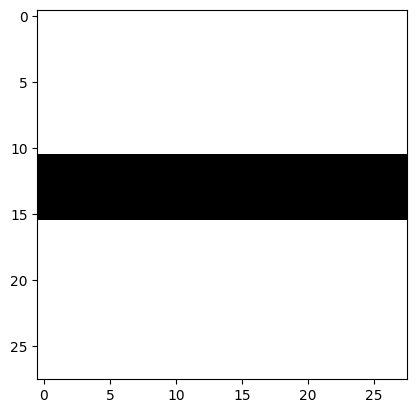

In [33]:
fig, axs = plt.subplots(1,1)
axs.imshow(zalando_plot(w_weight),cmap='gray', origin='upper')